In [255]:
from glob import glob
import yaml

params = glob("../data/results/wotan_tls/*.yaml")

In [256]:
seeds = [p.split("/")[-1].split(".")[0] for p in params]

In [257]:
import numpy as np

def right_candidate(t0, period, true_t0, true_period, verbose=False):
    t0_check = np.abs((t0  - true_t0 + 0.5 * true_period) % true_period - 0.5 * true_period)%period < 0.01
    period_check = np.abs(period - true_period) < 0.1
    same = np.logical_and(t0_check, period_check)
    if verbose:
        if not same:
            if not t0_check:
                output = f"t0 differ: {t0:.2e} {true_t0:.2e}"
            if not period_check:
                output = f"period differ: {period:.2e} {true_period:.2e}"
        else:
            output = "match"
        return same, output
    else:
        return same

In [258]:
detected = []
relative_duration = []
relative_depth = []

for seed in seeds:
    params = yaml.full_load(open(f"../data/params/{seed}.yaml", "r"))
    result = yaml.full_load(open(f"../data/results/wotan_tls/{seed}.yaml", "r"))
    detected.append(right_candidate(params['t0'], params['period'], result['t0'], result['period']))
    relative_depth.append(params['relative_depth'])
    relative_duration.append(params['relative_duration'])
    
amp = np.array(relative_depth)
var = np.array(relative_duration)

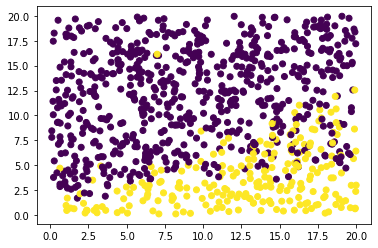

In [259]:
import matplotlib.pyplot as plt

plt.scatter(relative_duration, relative_depth, c=detected)

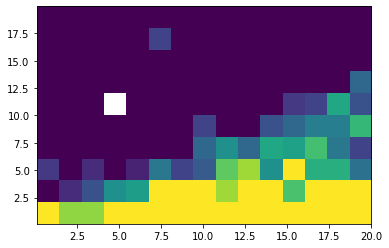

In [260]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from scipy.stats import binned_statistic_2d

bins_w, P, A, _ = binned_statistic_2d(amp, var, detected, bins=[10, 15])
plt.imshow(bins_w, extent=(min(var), max(var), min(amp), max(amp)), origin="lower", aspect='auto')

In [242]:
df.to_csv(")

SyntaxError: EOL while scanning string literal (346327759.py, line 1)

In [54]:
df

,relative_duration,relativce_depth,wotan_tls,nuance_detected
0,2.143408,3.629590,False,False
1,1000.000000,0.100000,True,True
2,2.798910,3.569924,False,True
3,2.236375,0.227039,False,True
